In [146]:
# Importing the most important library for this code.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn import tree

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [162]:
penguins  = sns.load_dataset('penguins') # Load the pattern library from seaborn 
shape= penguins.shape
print("The shape :",shape)
penguins

The shape : (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Getting to know bit more about the data

In [80]:
penguins.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [81]:
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


### Treatment of missing values data NAN

In [163]:
penguins.isnull().sum() 

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [164]:
# Treatment of missing values data
Nulls = ['bill_length_mm','flipper_length_mm','bill_depth_mm','body_mass_g']
for i in Nulls:
    penguins[i] = penguins[i].fillna(penguins[i].mean())

In [165]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

## Exploring the library Seaborn by pairplot

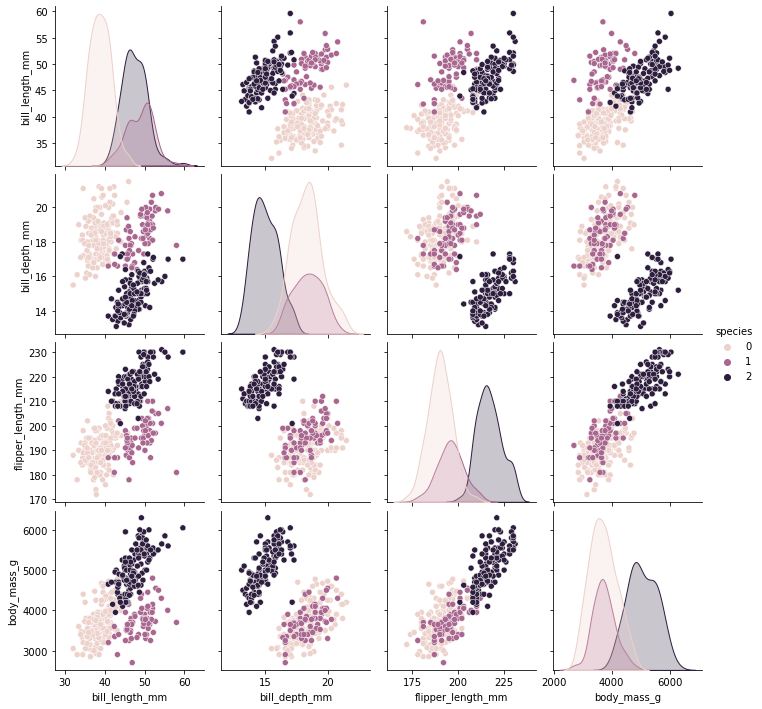

In [119]:
sns.pairplot(data = penguins , hue ='species' )

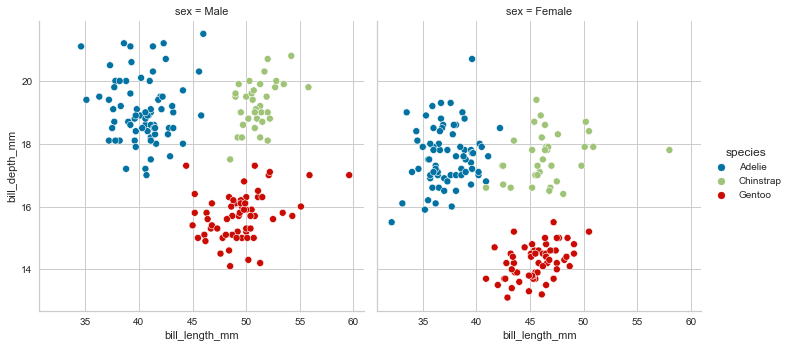

In [202]:

sns.relplot(data = penguins, legend ='auto', col='sex',hue='species', x ='bill_length_mm', y ='bill_depth_mm')


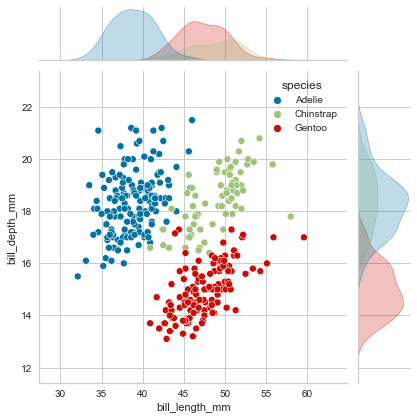

In [206]:

sns.jointplot(data=penguins,hue = 'species', x = 'bill_length_mm', y = 'bill_depth_mm', color='m')


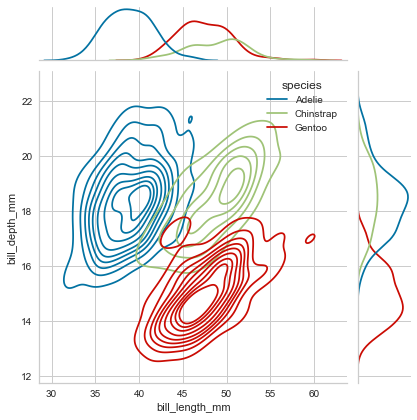

In [208]:
sns.jointplot(kind ='kde', data=penguins,hue = 'species', x = 'bill_length_mm', y = 'bill_depth_mm', color='m')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

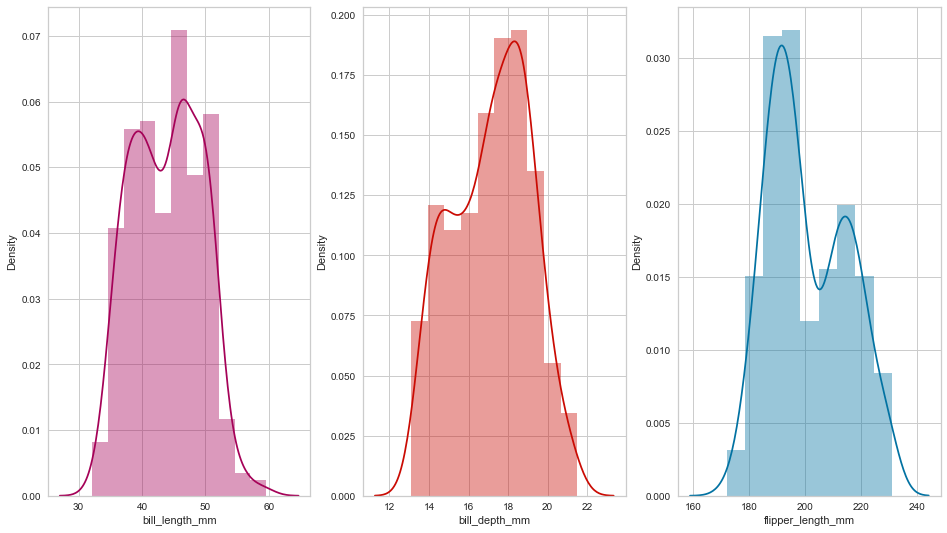

In [200]:
plt.figure(1, figsize = [16,9])
plt.subplot(1,3,1)
sns.distplot(penguins['bill_length_mm'], color = 'm')
plt.subplot(1,3,2)
sns.distplot(penguins['bill_depth_mm'], color = 'r')
plt.subplot(1,3,3)
sns.distplot(penguins['flipper_length_mm'], color = 'b')

In [121]:
# Finding correlation matrix
corr= penguins.corr()
corr

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,1.000000,0.728674,-0.741335,0.851160,0.747726
bill_length_mm,0.728674,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.741335,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.851160,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.747726,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

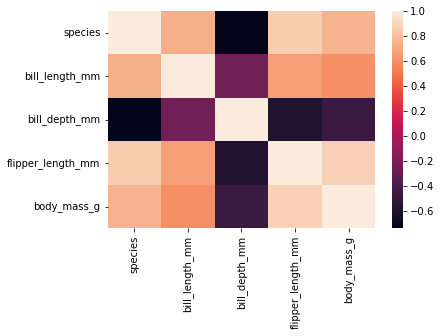

In [122]:
sns.heatmap(corr)

In [166]:
# Data Pre-processing
target = penguins['species']
datacopy= penguins.copy()
datacopy = datacopy.drop('species', axis=1)
print("The shape of copy database :", datacopy.shape)
print("Thedatabase \n:",datacopy.describe())
print("-------------\n")
print('Target data :', target.describe())

The shape of copy database : (344, 6)
Thedatabase 
:        bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      344.000000     344.000000         344.000000   344.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.443643       1.969027          14.020657   799.613058
min         32.100000      13.100000         172.000000  2700.000000
25%         39.275000      15.600000         190.000000  3550.000000
50%         44.250000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000
-------------

Target data : count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object


In [124]:

x = penguins.iloc[:,[2,3,4,5]].values

print("Species columns :",x) 
le=LabelEncoder()
penguins['species'] = le.fit_transform(penguins['species'])
print("\n")
print("Shape penguins data \n",penguins)
y = penguins['species'].values
print("\n")
print("dataset y \n" ,y)
print("dataset x\n ", x)

Species columns : [[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 ...
 [  50.4   15.7  222.  5750. ]
 [  45.2   14.8  212.  5200. ]
 [  49.9   16.1  213.  5400. ]]


Shape penguins data 
      species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0  Torgersen        39.10000       18.70000         181.000000   
1          0  Torgersen        39.50000       17.40000         186.000000   
2          0  Torgersen        40.30000       18.00000         195.000000   
3          0  Torgersen        43.92193       17.15117         200.915205   
4          0  Torgersen        36.70000       19.30000         193.000000   
..       ...        ...             ...            ...                ...   
339        2     Biscoe        43.92193       17.15117         200.915205   
340        2     Biscoe        46.80000       14.30000         215.000000   
341        2     Biscoe        50.40000       15.70000         222.000000

In [125]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [126]:
import sklearn.metrics as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=50)
print("Training split:",x_train.shape)
print("Testing spllit:",x_test.shape)

Training split: (230, 4)
Testing spllit: (114, 4)


In [127]:
# Decision Tree
method = DecisionTreeClassifier()
method.fit(x_train,y_train)

DecisionTreeClassifier()

In [129]:
# Classification Report and Confusion Matrix
y_pred=method.predict(x_test)
print("Classification report:\n",classification_report(y_test,y_pred))



Classification report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        55
           1       0.89      0.96      0.92        25
           2       0.94      1.00      0.97        34

    accuracy                           0.95       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.95      0.95      0.95       114



In [130]:

print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 0.9473684210526315


In [142]:

from yellowbrick.regressor import ResidualsPlot
print(f'R² = {method.score(x,y)}')
adj_r2 = 1 - ( 1-method.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
print (f'Adjusted_R² = {adj_r2}')

R² = 0.9825581395348837
Adjusted_R² = 0.9823523358715784


In [143]:


ac=confusion_matrix(y_test,y_pred)
ac



array([[50,  3,  2],
       [ 1, 24,  0],
       [ 0,  0, 34]], dtype=int64)

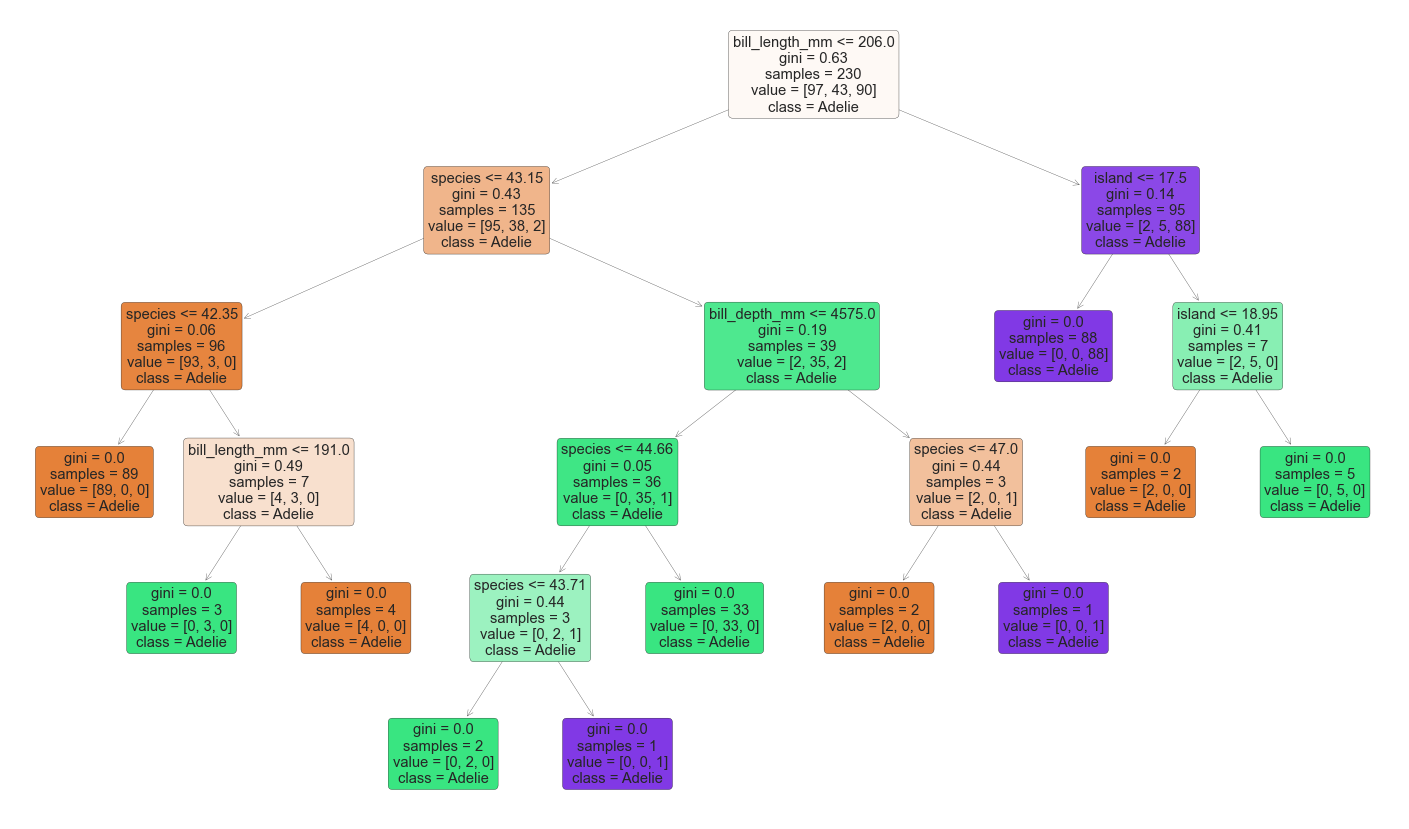

In [168]:

#Visualization of trained model
from sklearn.tree import plot_tree
#visualizing the graph
plt.figure(figsize=(25,15))
tree1=plot_tree(method,feature_names=penguins.columns,precision=2,
                rounded=True,filled=True,
                class_names=target.values)



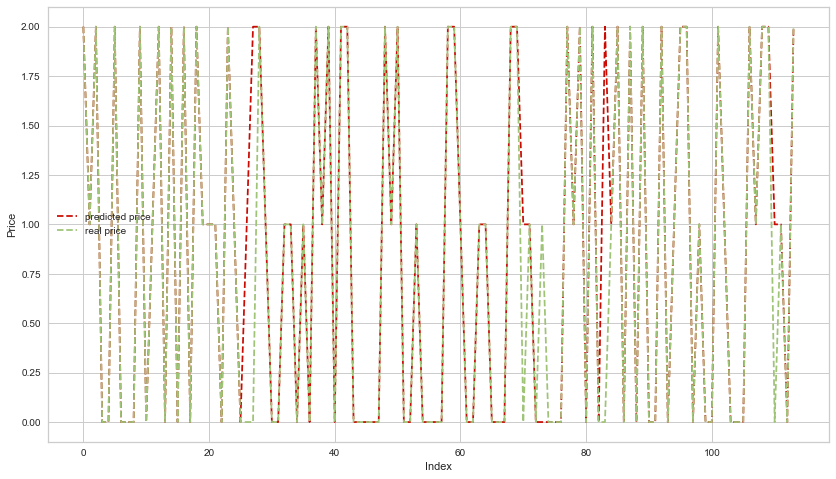

In [169]:

plt.figure(figsize=(14,8))
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['predicted price', 'real price'])
plt.ylabel('Price')
plt.xlabel('Index')

plt.show()
